# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv

import nltk as nltk


import alpaca_trade_api as tradeapi
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [4]:
# Load env
load_dotenv()

# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en",
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news_en['totalResults']}")

# Show sample article
bitcoin_news_en["articles"][0]

Total articles about Bitcoin: 7564


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [7]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_news_en['totalResults']}")

# Show sample article
ethereum_news_en["articles"][0]

Total articles about Ethereum: 2987


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Tenderly raises $15.3M to help Ethereum developers ship decentralized apps faster',
 'description': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto space in 2021. The latest crypto startup to court the attenti…',
 'url': 'http://techcrunch.com/2021/07/29/tenderly-raises-15-3m-to-help-ethereum-developers-ship-decentralized-apps-faster/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/07/Tenderly-Founding-Team-1.jpg?w=600',
 'publishedAt': '2021-07-29T18:27:16Z',
 'content': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]'}

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847
4,2021-08-12,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
2,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861
3,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000
4,2021-08-05,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.065575,0.054700,0.040100,0.905200
std,0.454145,0.062087,0.069485,0.072491
min,-0.886000,0.000000,0.000000,0.729000
25%,-0.307000,0.000000,0.000000,0.860500
50%,0.000000,0.026000,0.000000,0.908000
75%,0.471750,0.096250,0.076250,0.954250
max,0.690800,0.178000,0.271000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.084295,0.043300,0.015300,0.941350
std,0.306941,0.060341,0.031872,0.061367
min,-0.440400,0.000000,0.000000,0.810000
25%,0.000000,0.000000,0.000000,0.914500
50%,0.000000,0.000000,0.000000,0.946000
75%,0.243725,0.059000,0.000000,1.000000
max,0.695600,0.190000,0.094000,1.000000


#### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has mean positive score of 0.0547 while Ethereum has a mean positive score of 0.0433. Therefore the highest mean positive is with Bitcoin.  

Q: Which coin had the highest compound score?

A: Bitcoin has a max compound score of 0.06908 while for Ethereum it is 0.06956, thus the highest compound score is for Ethereum.

Q. Which coin had the highest positive score?

A: Bitcoin has a max positive score of 0.178 while for Ethereum it is 0.190, thus the highest compound score is for Ethereum.

Discussion: This implies ingeneral the sentiment for Bitcoin on average is better. Likely this is becasue Bitcoin is bigger buzzword compared to Ethereum. It is however intersting to see Bitcoin average negative setiment is significantly higher than that of Ethereum. Likely due to swings for Bitcoin is much higher than Ethereum. Standard deviation of this negative mean is also significantly high for Bitcoin as expected compared to Ethereum.   

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation

import re

In [120]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_extra = {'said',
            'seen',
            'mln',
            'kilometer',
            'kl',
            'mile',
            'kilogram',
            'kg',
            's',
            'second', 
            'nt',
            'char'}

# Updating the the list of stopwords
for word in sw_extra:
    sw.add(word)

# The new set of stopwords
sw = set(sw)

In [121]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    # Regex initializing - removing special letters
    regex = re.compile("[^a-zA-Z ]")
    
    # Substituting special letters with spaces 
    re_clean = regex.sub(' ', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase and remove the stop words
    lowered_words = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove punctuations
    tokens = [word for word in lowered_words if word not in punctuation]
    
    return tokens

In [122]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokenized"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokenized
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedle, getty, images, twitter, s..."
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[retailers, increasingly, accepting, cryptocur..."
4,2021-08-12,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729,"[joe, tidycyber, reporter, follow, money, gene..."


In [123]:
# Create a new tokens column for Ethereum
ethereum_df["tokenized"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokenized
0,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, wa, founded, ad, free, creator, network..."
2,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[bell, today, coinbase, reported, another, per..."
3,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[representation, ethereum, virtual, currency, ..."
4,2021-08-05,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000,"[hong, kong, aug, reuters, ether, held, near, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [124]:
from collections import Counter
from nltk import ngrams

In [125]:
# Generate the Bitcoin N-grams where N=2

bitcoin_list = bitcoin_df.tokenized

bitcoin_token_collection_list = []

for e in bitcoin_list:
    for ee in e:
        bitcoin_token_collection_list.append(ee)

bitcoin_bigram_counts = Counter(ngrams(bitcoin_token_collection_list, n=2))
print(dict(bitcoin_bigram_counts))

{('wife', 'started'): 1, ('started', 'little'): 1, ('little', 'garden'): 1, ('garden', 'urban'): 1, ('urban', 'backyard'): 1, ('backyard', 'could'): 1, ('could', 'think'): 1, ('think', 'worm'): 1, ('worm', 'also'): 1, ('also', 'bug'): 1, ('bug', 'dirt'): 1, ('dirt', 'course'): 1, ('course', 'filled'): 1, ('filled', 'worm'): 1, ('worm', 'bug'): 1, ('bug', 'composted'): 1, ('composted', 'corn'): 1, ('corn', 'cob'): 1, ('cob', 'like'): 1, ('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'photo'): 1, ('photo', 'joe'): 1, ('joe', 'raedle'): 1, ('

In [127]:
# Generate the Ethereum N-grams where N=2

# Creating a single list of tokens from the dataframe text column
ethereum_list = ethereum_df.tokenized

ethereum_token_collection_list = []

# Creating a single list of tokens from the dataframe text column 
for e in ethereum_list:
    for ee in e:
        ethereum_token_collection_list.append(ee)

ethereum_bigram_counts = Counter(ngrams(ethereum_token_collection_list, n=2))
print(dict(ethereum_bigram_counts))

{('blockchain', 'infrastructure'): 1, ('infrastructure', 'startup'): 1, ('startup', 'heating'): 1, ('heating', 'industry'): 1, ('industry', 'fervor'): 1, ('fervor', 'brings'): 1, ('brings', 'developer'): 1, ('developer', 'user'): 1, ('user', 'space'): 1, ('space', 'still'): 1, ('still', 'feel'): 1, ('feel', 'extremely'): 1, ('extremely', 'young'): 1, ('young', 'despite'): 1, ('despite', 'heavy'): 1, ('heavy', 'institutional'): 1, ('institutional', 'embrace'): 1, ('embrace', 'crypto'): 1, ('crypto', 'cent'): 1, ('cent', 'wa'): 1, ('wa', 'founded'): 1, ('founded', 'ad'): 1, ('ad', 'free'): 1, ('free', 'creator'): 1, ('creator', 'network'): 1, ('network', 'allows'): 1, ('allows', 'user'): 1, ('user', 'offer'): 1, ('offer', 'crypto'): 1, ('crypto', 'reward'): 1, ('reward', 'good'): 1, ('good', 'post'): 1, ('post', 'comment'): 1, ('comment', 'like'): 1, ('like', 'gifting'): 1, ('gifting', 'award'): 1, ('award', 'reddit'): 1, ('reddit', 'ethereum'): 1, ('ethereum', 'bell'): 1, ('bell', 'toda

In [128]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [129]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(token_count(bitcoin_token_collection_list)))

{'reuters': 14, 'bitcoin': 9, 'illustration': 8, 'cryptocurrency': 5, 'july': 5, 'taken': 5, 'dado': 5, 'mobile': 4, 'data': 4, 'ruvic': 4}


In [130]:
# Use token_count to get the top 10 words for Ethereum
print(dict(token_count(ethereum_token_collection_list)))

{'ethereum': 15, 'reuters': 8, 'ha': 7, 'blockchain': 5, 'ether': 5, 'network': 4, 'dado': 4, 'ruvic': 4, 'bitcoin': 4, 'vitalik': 4}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

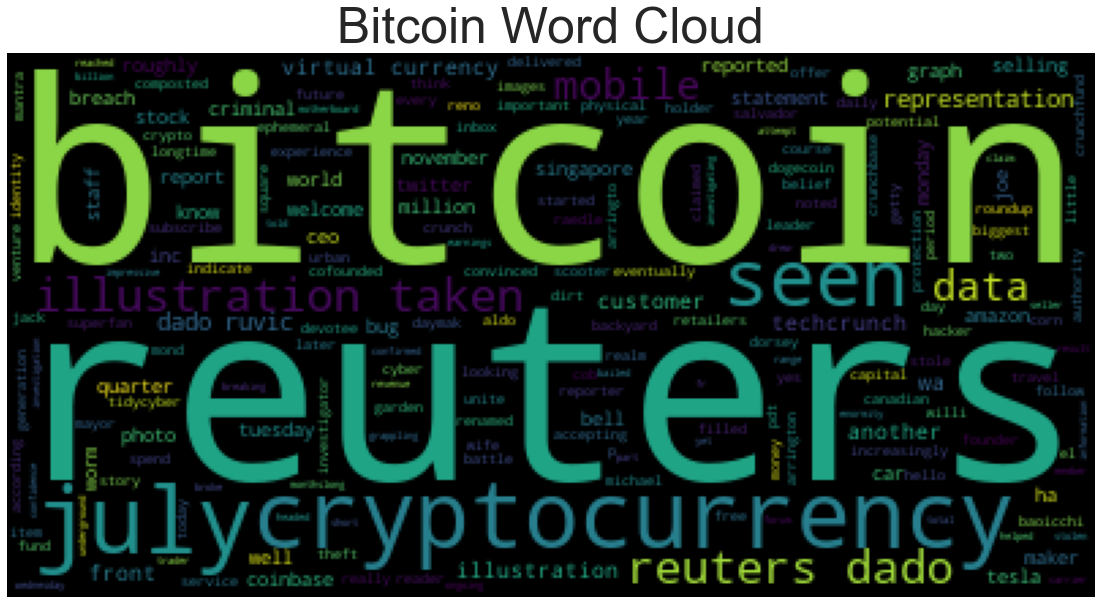

In [110]:
# Generate the Bitcoin word cloud

# Process text for wordcloud creation & concatenating a single string with all the tokens
bitcoin_big_string = ' '.join(bitcoin_token_collection_list)

# Initializing Word Cloud
wc = WordCloud().generate(bitcoin_big_string) # "hello_world this_is some artcle this is another article"
plt.title("Bitcoin Word Cloud", size = 50)
plt.grid(False)
plt.axis("off")
plt.imshow(wc)

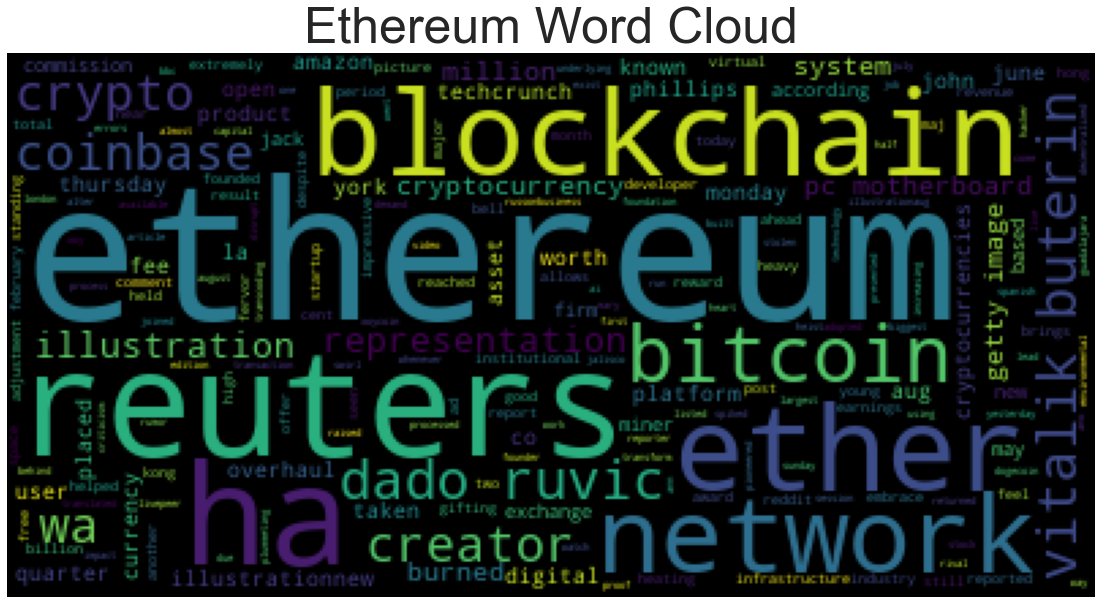

In [111]:
# Generate the Ethereum word cloud

# Process text for wordcloud creation & concatenating a single string with all the tokens
ethereum_big_string = ' '.join(ethereum_token_collection_list)

# Initializing Word Cloud
wc = WordCloud().generate(ethereum_big_string) # "hello_world this_is some artcle this is another article"
plt.title("Ethereum Word Cloud", size = 50)
plt.grid(False)
plt.axis("off")
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [83]:
import spacy
from spacy import displacy

In [84]:
# Download the language model for SpaCy - already done
# !python -m spacy download en_core_web_sm



In [85]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [86]:
# Using previously concatenated Bitcoin text 
bitcoin_big_string

'wife started little garden urban backyard could think worm also bug dirt course filled worm bug composted corn cob like dogecoin devotee mayor reno leader el salvador aldo baoicchi convinced cryptocurrency future ceo founder canadian scooter maker daymak belief photo joe raedle getty images twitter square ceo jack dorsey noted superfan bitcoin claimed monday cryptocurrency eventually unite world yes really mond retailers increasingly accepting cryptocurrency physical item know spend crypto ephemeral experience like travel cryptocurrency holder indicate willi joe tidycyber reporter follow money generation mantra investigator looking criminal cyber realm battle criminal authority ha get roundup techcrunchs biggest important story delivered inbox every day p pdt subscribe hello welcome daily crunch july mobile offer two year free identity theft protection service hacker stole data roughly million customer potential customer according statement mobile car longtime techcrunch reader know w

In [116]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_big_string)

# Add a title to the document
doc.user_data["title"]="Bitcoin NER"

In [117]:
# Render the visualization
displacy.render(doc, style='ent')

In [133]:
# List all Entities
print([ent.text for ent in doc.ents])

['today', 'quarter', 'quarter', 'february', 'reuters', 'hong kong', 'reuters', 'two month', 'thursday', 'june', 'reuters', 'monday', 'bbc news hacker', 'one', 'almost half', 'yesterday', 'london', 'john phillips', 'june', 'july', 'reuters', 'august sunday', 'million', 'spanish', 'guadalajara', 'first', 'jack taylor', 'us securities exchange commission', 'wednesday', 'monday', 'chicago', 'american express', 'buterin john phillips', 'thursday', 'jack', 'mark zuckerberg', 'alesia haas']


---

### Ethereum NER

In [90]:
# Using previously concatenated Ethereum text 
ethereum_big_string

'blockchain infrastructure startup heating industry fervor brings developer user space still feel extremely young despite heavy institutional embrace crypto cent wa founded ad free creator network allows user offer crypto reward good post comment like gifting award reddit ethereum bell today coinbase reported another period impressive result quarter earnings report quarter coinbase total revenue reached billion helped representation ethereum virtual currency standing pc motherboard seen illustration picture february reuters dado ruvic illustrationnew york aug reuters maj hong kong aug reuters ether held near two month high thursday ahead major adjustment underlying ethereum blockchain would alter way transaction processed representations cryptocurrencies bitcoin ethereum placed pc motherboard illustration taken june reuters dado ruvic illustrationaug reuters ethereum platform cryptocurrencies spiked monday amazon listed open job digital currency blockchain product lead amazon known plu

In [118]:
# Run the NER processor on all of the text
doc = nlp(ethereum_big_string)

# Add a title to the document
doc.user_data["title"]="Ethereum NER"

In [119]:
# Render the visualization
displacy.render(doc, style='ent')

In [132]:
# List all Entities
print([ent.text for ent in doc.ents])

['today', 'quarter', 'quarter', 'february', 'reuters', 'hong kong', 'reuters', 'two month', 'thursday', 'june', 'reuters', 'monday', 'bbc news hacker', 'one', 'almost half', 'yesterday', 'london', 'john phillips', 'june', 'july', 'reuters', 'august sunday', 'million', 'spanish', 'guadalajara', 'first', 'jack taylor', 'us securities exchange commission', 'wednesday', 'monday', 'chicago', 'american express', 'buterin john phillips', 'thursday', 'jack', 'mark zuckerberg', 'alesia haas']


---